### PCKF code with only linear terms - To match KF and ENKF with multiple floors

[[1.1 ]
 [1.2 ]
 [1.3 ]
 [0.9 ]
 [1.15]
 [1.4 ]
 [1.15]
 [1.3 ]
 [1.27]
 [1.05]]
Forecast PC coefficient matrix is
 [[1.1  0.2  0.3  0.2  0.15 0.3  0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [1.2  0.4  0.2  0.16 0.22 0.31 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [1.3  0.4  0.3  0.19 0.15 0.34 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.9  0.3  0.2  0.24 0.19 0.28 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [1.15 0.4  0.1  0.4  0.1  0.18 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [1.4  0.4  0.4  0.2  0.1  0.3  0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [1.15 0.5  0.1  0.19 0.2  0.16 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [1.3  0.5  0.2  0.2  0.1  0.25 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [1.27 0.3  0.2  0.1  0.05 0.13 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [1.05 0.2  0.2  0.19 0.26 0.2  0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]]
Hk matrix is
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1

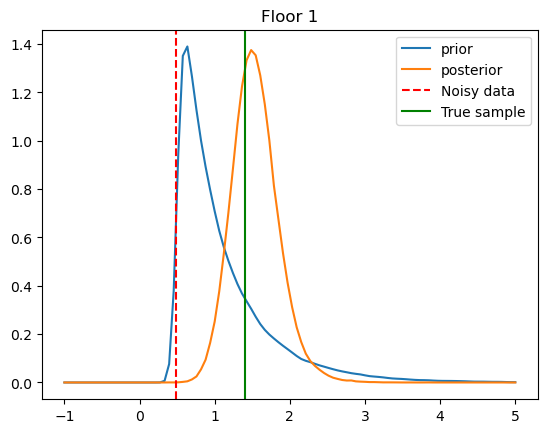

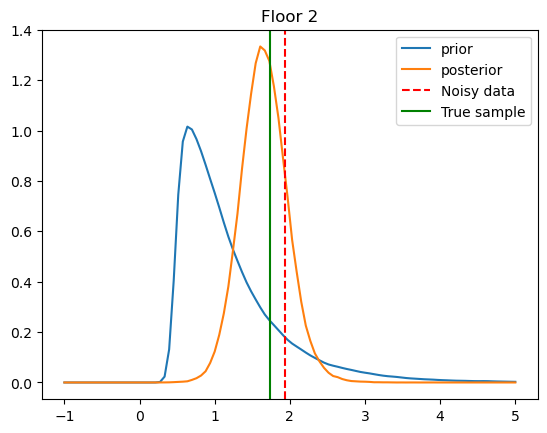

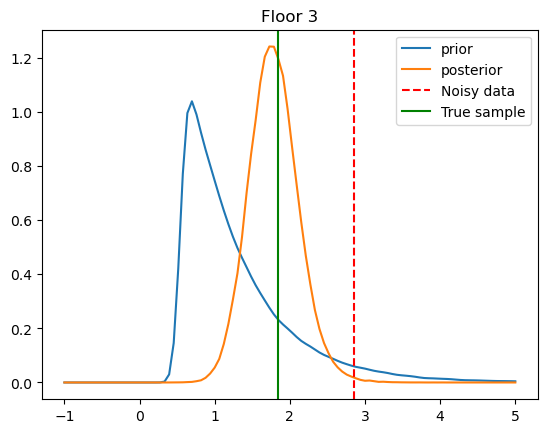

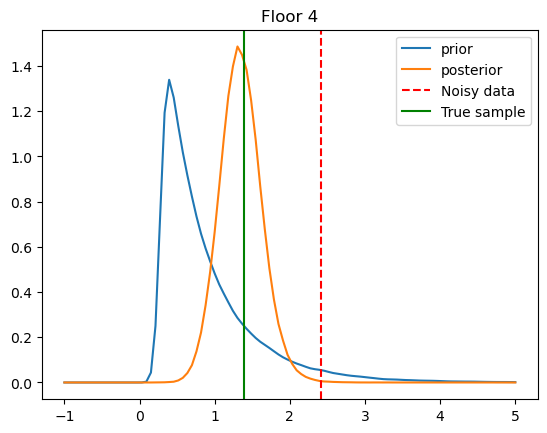

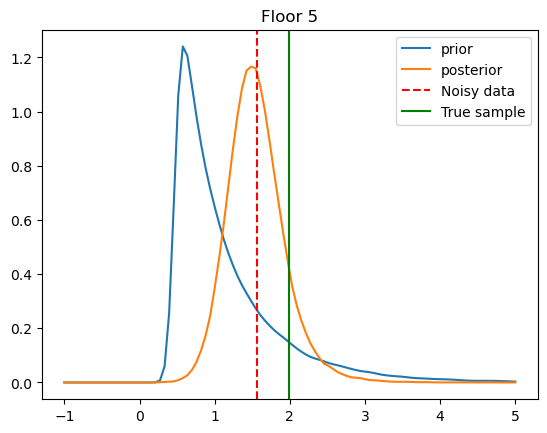

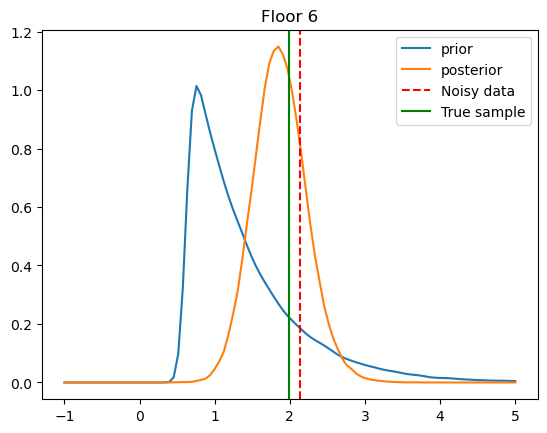

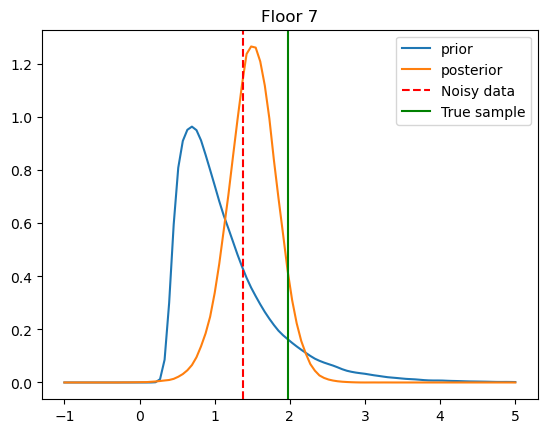

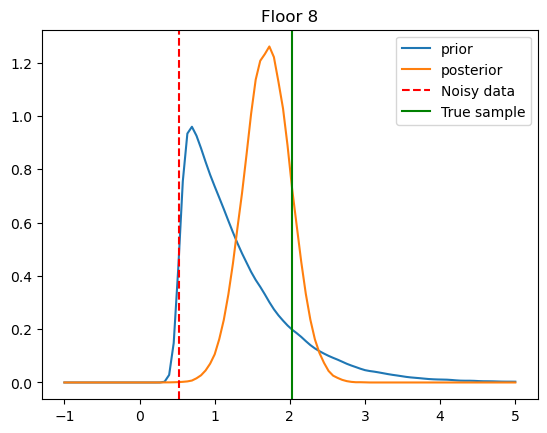

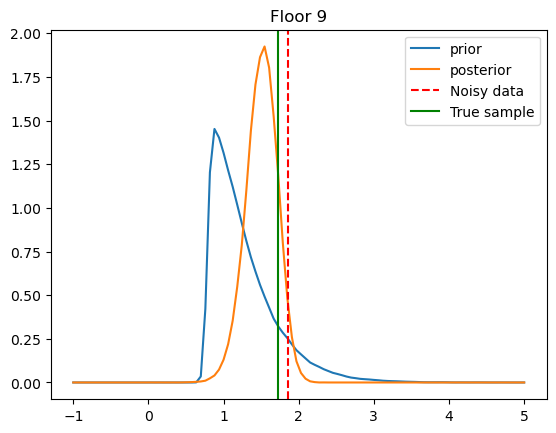

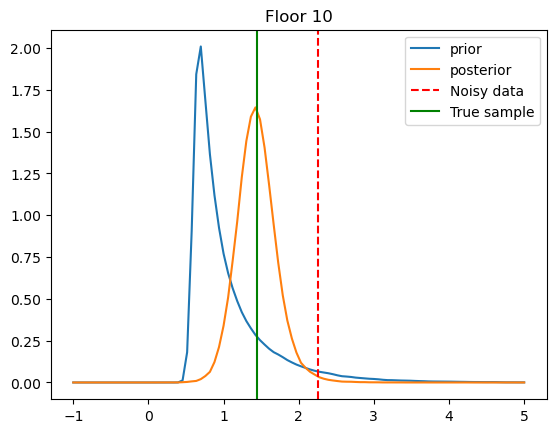

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

from scipy.special import factorial

from scipy.stats import gaussian_kde

floors = 10

### When changing number of observations, the variance of chaos vector needs manual change
observed = 10

nrv = 2
order = 2
npc = (factorial(nrv+order) / ( factorial(nrv) * factorial(order) )).astype(int)
pccoeff =  int( npc + observed )
## First index is floor number and second is PC coefficient


# First floor
u10 = 1.1 # mean
u11 = 0.2 # xi1 
u12 = 0.3 # xi2
u13 = 0.2 # xi1 ^2 - 1
u14 = 0.15 # xi1* xi2
u15 = 0.3 # xi2 ^2 - 1
u16 = 0
u17 = 0

# Second floor
u20 = 1.2
u21 = 0.4
u22 = 0.2
u23 = 0.16
u24 = 0.22
u25 = 0.31
u26 = 0 
u27 = 0


# Third floor
u30 = 1.3
u31 = 0.4
u32 = 0.3
u33 = 0.19
u34 = 0.15
u35 = 0.34
u36 = 0
u37 = 0


# 4 th floor
u40 = 0.9 # mean
u41 = 0.3 # xi1 
u42 = 0.2 # xi2
u43 = 0.24 # xi1 ^2 - 1
u44 = 0.19 # xi1* xi2
u45 = 0.28 # xi2 ^2 - 1
u46 = 0
u47 = 0

# 5 th floor
u50 = 1.15
u51 = 0.4
u52 = 0.1
u53 = 0.4
u54 = 0.1
u55 = 0.18
u56 = 0 
u57 = 0


# 6 th floor
u60 = 1.4
u61 = 0.4
u62 = 0.4
u63 = 0.2
u64 = 0.1
u65 = 0.3
u66 = 0
u67 = 0


# 7 th floor
u70 = 1.15 # mean
u71 = 0.5 # xi1 
u72 = 0.1 # xi2
u73 = 0.19 # xi1 ^2 - 1
u74 = 0.2 # xi1* xi2
u75 = 0.16 # xi2 ^2 - 1
u76 = 0
u77 = 0

# 8 th floor
u80 = 1.3
u81 = 0.5
u82 = 0.2
u83 = 0.2
u84 = 0.1
u85 = 0.25
u86 = 0 
u87 = 0


# 9 th floor
u90 = 1.27
u91 = 0.3
u92 = 0.2
u93 = 0.1
u94 = 0.05
u95 = 0.13
u96 = 0
u97 = 0

# 10 th floor
u100 = 1.05
u101 = 0.2
u102 = 0.2
u103 = 0.19
u104 = 0.26
u105 = 0.2
u106 = 0
u107 = 0


###################################### ##########################

# u1_priorpdf[:,0] = u10 + u11 *  xi1 + u12 *  xi2   + u13 * (xi1 **2 - 1) + u14 * (xi1 * xi2 ) + u15 * (xi2**2 - 1 ) \
#  + u16 * (eta1) + u17 * eta2

# u2_priorpdf[:,0] = u20 + u21 *  xi1 + u22 *  xi2 + u23 * (xi1 **2 - 1) + u24 * (xi1 * xi2 ) + u25 * (xi2**2 - 1 ) \
#  + u26 * (eta1) + u27 * eta2

# u3_priorpdf[:,0] = u30 + u31 *  xi1 + u32 *  xi2 + u33 * (xi1 **2 - 1) + u34 * (xi1 * xi2 ) + u35 * (xi2**2 - 1 ) \
#  + u36 * (eta1) + u37 * eta2


########################################### ###############################

## Creating matrix A_u with all PC coefficient vectors

U0 = np.array([[u10], [u20], [u30], [u40], [u50], [u60], [u70], [u80], [u90], [u100]])
U1 = np.array([[u11], [u21], [u31], [u41], [u51], [u61], [u71], [u81], [u91], [u101]])
U2 = np.array([[u12], [u22], [u32], [u42], [u52], [u62], [u72], [u82], [u92], [u102]])

U3 = np.array([[u13], [u23], [u33], [u43], [u53], [u63], [u73], [u83], [u93], [u103]])
U4 = np.array([[u14], [u24], [u34], [u44], [u54], [u64], [u74], [u84], [u94], [u104]])
U5 = np.array([[u15], [u25], [u35], [u45], [u55], [u65], [u75], [u85], [u95], [u105]])


# U3 = np.array([[u13], [u23], [u33]])
# U4 = np.array([[u14], [u24], [u34]])
# U5 = np.array([[u15], [u25], [u35]])

# U3 = np.array([[u13], [u23], [u33]])

print(U0)

A_f = np.zeros((floors,pccoeff))

A_f[:,0] = U0.reshape(floors)
A_f[:,1] = U1.reshape(floors)
A_f[:,2] = U2.reshape(floors)
A_f[:,3] = U3.reshape(floors)
A_f[:,4] = U4.reshape(floors)
A_f[:,5] = U5.reshape(floors)
# A_f[:,3] = U3.reshape(floors)
print("Forecast PC coefficient matrix is\n", A_f)



########################################### ###############################
### Sampling for generating the PDF

np.random.seed(31)


nsamp =  100000

u_priorpdf = np.zeros((nsamp,floors))

xi1 = np.random.normal(0,1, nsamp)
xi2 = np.random.normal(0,1, nsamp)


eta1 = np.random.normal(0,1,nsamp)
eta2 = np.random.normal(0,1,nsamp)
eta3 = np.random.normal(0,1,nsamp)
eta4 = np.random.normal(0,1,nsamp)
eta5 = np.random.normal(0,1,nsamp)
eta6 = np.random.normal(0,1,nsamp)
eta7 = np.random.normal(0,1,nsamp)
eta8 = np.random.normal(0,1,nsamp)
eta9 = np.random.normal(0,1,nsamp)
eta10 = np.random.normal(0,1,nsamp)


u_priorpdf[:,0] = A_f[0,0] * np.ones(nsamp) + A_f[0,1] *  xi1 + A_f[0,2] *  xi2 + A_f[0,3] *  (xi1**2 - 1) + A_f[0,4] *  (xi1 * xi2) \
    + A_f[0,5] *  (xi2 **2 -1) \
    + A_f[0,6] * eta1 + A_f[0,7] * eta2 + A_f[0,8] * eta3 +  A_f[0,9] * eta4 + A_f[0,10] * eta5 +  A_f[0,11] * eta6  +  A_f[0,12] * eta7+  A_f[0,13] * eta8 +  A_f[0,14] * eta9 +  A_f[0,15] * eta10


u_priorpdf[:,1] = A_f[1,0] * np.ones(nsamp) + A_f[1,1] *  xi1 + A_f[1,2] *  xi2 + A_f[1,3] *  (xi1**2 - 1) + A_f[1,4] *  (xi1 * xi2) \
    + A_f[1,5] *  (xi2 **2 -1) \
+ A_f[1,6] * eta1 + A_f[1,7] * eta2 + A_f[1,8] * eta3 +  A_f[1,9] * eta4  + A_f[1,10] * eta5 +  A_f[1,11] * eta6  +  A_f[1,12] * eta7+  A_f[1,13] * eta8 + A_f[1,14] * eta9 +  A_f[1,15] * eta10


u_priorpdf[:,2] = A_f[2,0] * np.ones(nsamp) + A_f[2,1] *  xi1 + A_f[2,2] *  xi2  + A_f[2,3] *  (xi1**2 - 1) + A_f[2,4] *  (xi1 * xi2) \
    + A_f[2,5] *  (xi2 **2 -1) \
+ A_f[2,6] * eta1 + A_f[2,7] * eta2 + A_f[2,8] * eta3 +  A_f[2,9] * eta4 + A_f[2,10] * eta5 +  A_f[2,11] * eta6  +  A_f[2,12] * eta7+  A_f[2,13] * eta8  + A_f[2,14] * eta9 +  A_f[2,15] * eta10



u_priorpdf[:,3] = A_f[3,0] * np.ones(nsamp) + A_f[3,1] *  xi1 + A_f[3,2] *  xi2  + A_f[3,3] *  (xi1**2 - 1) + A_f[3,4] *  (xi1 * xi2) \
    + A_f[3,5] *  (xi2 **2 -1) \
+ A_f[3,6] * eta1 + A_f[3,7] * eta2 + A_f[3,8] * eta3 +  A_f[3,9] * eta4  + A_f[3,10] * eta5 +  A_f[3,11] * eta6  +  A_f[3,12] * eta7+  A_f[3,13] * eta8 + A_f[3,14] * eta9 +  A_f[3,15] * eta10



u_priorpdf[:,4] = A_f[4,0] * np.ones(nsamp) + A_f[4,1] *  xi1 + A_f[4,2] *  xi2  + A_f[4,3] *  (xi1**2 - 1) + A_f[4,4] *  (xi1 * xi2) \
    + A_f[4,5] *  (xi2 **2 -1) \
+ A_f[4,6] * eta1 + A_f[4,7] * eta2 + A_f[4,8] * eta3 +  A_f[4,9] * eta4  + A_f[4,10] * eta5 +  A_f[4,11] * eta6  +  A_f[4,12] * eta7+  A_f[4,13] * eta8 + A_f[4,14] * eta9 +  A_f[4,15] * eta10



u_priorpdf[:,5] = A_f[5,0] * np.ones(nsamp) + A_f[5,1] *  xi1 + A_f[5,2] *  xi2  + A_f[5,3] *  (xi1**2 - 1) + A_f[5,4] *  (xi1 * xi2) \
    + A_f[5,5] *  (xi2 **2 -1) \
+ A_f[5,6] * eta1 + A_f[5,7] * eta2 + A_f[5,8] * eta3 +  A_f[5,9] * eta4 +  A_f[5,10] * eta5 +  A_f[5,11] * eta6  +  A_f[5,12] * eta7+  A_f[5,13] * eta8 + A_f[5,14] * eta9 +  A_f[5,15] * eta10



u_priorpdf[:,6] = A_f[6,0] * np.ones(nsamp) + A_f[6,1] *  xi1 + A_f[6,2] *  xi2 + A_f[6,3] *  (xi1**2 - 1) + A_f[6,4] *  (xi1 * xi2) \
    + A_f[6,5] *  (xi2 **2 -1) \
+ A_f[6,6] * eta1 + A_f[6,7] * eta2 + A_f[6,8] * eta3 +  A_f[6,9] * eta4 + A_f[6,10] * eta5 +  A_f[6,11] * eta6  +  A_f[6,12] * eta7+  A_f[6,13] * eta8 + A_f[6,14] * eta9 +  A_f[6,15] * eta10



u_priorpdf[:,7] = A_f[7,0] * np.ones(nsamp) + A_f[7,1] *  xi1 + A_f[7,2] *  xi2  + A_f[7,3] *  (xi1**2 - 1) + A_f[7,4] *  (xi1 * xi2) \
    + A_f[7,5] *  (xi2 **2 -1) \
+ A_f[7,6] * eta1 + A_f[7,7] * eta2 + A_f[7,8] * eta3 +  A_f[7,9] * eta4 + A_f[7,10] * eta5 +  A_f[7,11] * eta6  +  A_f[7,12] * eta7+  A_f[7,13] * eta8 + A_f[7,14] * eta9 +  A_f[7,15] * eta10



u_priorpdf[:,8] = A_f[8,0] * np.ones(nsamp) + A_f[8,1] *  xi1 + A_f[8,2] *  xi2 + A_f[8,3] *  (xi1**2 - 1) + A_f[8,4] *  (xi1 * xi2) \
    + A_f[8,5] *  (xi2 **2 -1) \
+ A_f[8,6] * eta1 + A_f[8,7] * eta2 + A_f[8,8] * eta3 +  A_f[8,9] * eta4  + A_f[8,10] * eta5 +  A_f[8,11] * eta6  +  A_f[8,12] * eta7+  A_f[8,13] * eta8 + A_f[8,14] * eta9 +  A_f[8,15] * eta10



u_priorpdf[:,9] = A_f[9,0] * np.ones(nsamp) + A_f[9,1] *  xi1 + A_f[9,2] *  xi2  + A_f[9,3] *  (xi1**2 - 1) + A_f[9,4] *  (xi1 * xi2) \
    + A_f[9,5] *  (xi2 **2 -1) \
+ A_f[9,6] * eta1 + A_f[9,7] * eta2 + A_f[9,8] * eta3 +  A_f[9,9] * eta4 + A_f[9,10] * eta5 +  A_f[9,11] * eta6  +  A_f[9,12] * eta7+  A_f[9,13] * eta8 + A_f[9,14] * eta9 +  A_f[9,15] * eta10



# for i in range(floors):

#     kde = gaussian_kde(u_priorpdf[:,i], bw_method='scott')

#     kde_floor[:,i] = kde(x1)


########################################### ########################################################################## ###############################



### Generating the data vector

Hk = np.zeros((observed,floors))

# Hk = np.zeros((observed,pccoeff))


for i in range(observed):
    Hk[i,i] = 1


# Hk[2,2] = 1

# for i in range(pccoeff):
#     Hk[:,i] = h_k

## PC coefficients of data

print("Hk matrix is\n", Hk)


Df = Hk @ A_f

print('Df is', Df)


###### Generating samples of true data

np.random.seed(39)

xi1 = np.random.normal(0,1, 1)
xi2 = np.random.normal(0,1, 1)

eta1 = np.random.normal(0,1,1)
eta2 = np.random.normal(0,1,1)
eta3 = np.random.normal(0,1,1)
eta4 = np.random.normal(0,1,1)
eta5 = np.random.normal(0,1,1)
eta6 = np.random.normal(0,1,1)
eta7 = np.random.normal(0,1,1)
eta8 = np.random.normal(0,1,1)
eta9 = np.random.normal(0,1,1)
eta10 = np.random.normal(0,1,1)


sample = np.zeros((observed))


sample = Df[:,0] * 1 + Df[:,1] *  xi1 + Df[:,2] *  xi2  + Df[:,3] *  (xi1**2 - 1) + Df[:,4] *  (xi1 * xi2) +  Df[:,5] *  (xi2**2 - 1)
+ Df[:,6] * eta1 + Df[:,7] * eta2 + Df[:,8] * eta3 +  Df[:,9] * eta4 + Df[:,10] * eta5 +  Df[:,11] * eta6  +  Df[:,12] * eta7+  Df[:,13] * eta8 +  Df[:,14] * eta9 +  Df[:,15] * eta10

###

dk = np.zeros((observed,pccoeff))

# noise = np.eye(observed)
Gamma = np.eye(observed)
# noisevar = 0.8

noisevar = np.zeros((observed,1))

noisevar = [0.8,0.8,0.8,0.8,0.5,1.5,1.5,0.6,2.0,0.8]


np.random.seed(108)

nsteps = 1

epsilon = np.random.normal(0,1,size=(observed,nsteps))


Gamma = Gamma * noisevar

H_knoise = np.eye((observed))


### Taking the same sample as EnKF 
# sample = np.loadtxt('./../EnKF/sample.txt')

print("true data sample is",sample.reshape(floors,1))

noise = np.sqrt(noisevar).reshape(observed,1) * epsilon

print("noise is",noise)
# sample = sample.reshape(floors,1)

# print(noise)
d0 = sample.reshape(observed,1) + noise


np.savetxt('./data_sample.txt',sample.reshape(floors,1))

# d0 = np.array([[0.8], [0.5]])


# d0 = np.array([[0.8], [0.5]])

dk[:,0] = d0.reshape(observed)


for i in range(observed):
    dnoise =  H_knoise @ np.sqrt(Gamma[i,:])
    # print(dnoise)
    # dnoise = dnoise.reshape(observed,1) @ epsilon[i,:].reshape(1,1)
    # dk[:,pccoeff-observed+i] = dnoise.reshape(observed)
    dk[:,pccoeff-observed+i] = dnoise.reshape(observed)
# d1 = np.zeros(floors,1)
# d1 = np.zeros(floors,1)

print("data matrix is\n", dk)


### Constructing covariance matrix

# varpclinear = [1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1]

varpcnonlinear = [1, 1, 1, 2, 1, 2, 1,1, 1, 1, 1, 1, 1, 1, 1, 1]

P_k = np.zeros((floors,floors))

P_u = np.zeros((floors,floors))

for i in range(1,pccoeff):
    P_k = P_k + varpcnonlinear[i] * (A_f[:,i].reshape(floors,1) @  (A_f[:,i].reshape(floors,1)).T)


print("forecast covariance is\n", P_k)

print("Noise covariance is\n", Gamma)



K_g = P_k @ Hk.T @ np.linalg.inv(Hk @ P_k @ Hk.T + Gamma)


# print("Kalman gain is\n", K_g)


### Update state

# u_a = np.zeros((floors,pccoeff))

A_u = A_f + K_g @ (dk - Hk @ A_f)

# for i in range(pccoeff):
#     u_a[:,i] = A_f[:,i] + K_g @ (dk[:,i].reshape(observed,1) - Hk @ A_f[:,i].reshape(floors,1))

# print("updated state is\n", A_u)


for i in range(1,pccoeff):
    P_u = P_u + varpcnonlinear[i] * (A_u[:,i].reshape(floors,1) @  (A_u[:,i].reshape(floors,1)).T)


# print("updated covariance is\n", P_u)


##### Posterior pdfs

np.random.seed(90)

xi1 = np.random.normal(0,1, nsamp)
xi2 = np.random.normal(0,1, nsamp)


eta1 = np.random.normal(0,1,nsamp)
eta2 = np.random.normal(0,1,nsamp)
eta3 = np.random.normal(0,1,nsamp)
eta4 = np.random.normal(0,1,nsamp)
eta5 = np.random.normal(0,1,nsamp)
eta6 = np.random.normal(0,1,nsamp)
eta7 = np.random.normal(0,1,nsamp)
eta8 = np.random.normal(0,1,nsamp)
eta9 = np.random.normal(0,1,nsamp)
eta10 = np.random.normal(0,1,nsamp)


u_posteriorpdf = np.zeros((nsamp,floors))

u_posteriorpdf[:,0] = A_u[0,0] * np.ones(nsamp) + A_u[0,1] *  xi1 + A_u[0,2] *  xi2 + A_u[0,3] *  (xi1**2 - 1) + A_u[0,4] *  (xi1 * xi2) \
    + A_u[0,5] *  (xi2 **2 -1) \
    + A_u[0,6] * eta1 + A_u[0,7] * eta2 + A_u[0,8] * eta3 +  A_u[0,9] * eta4 + A_u[0,10] * eta5 +  A_u[0,11] * eta6  +  A_u[0,12] * eta7+  A_u[0,13] * eta8 +  A_u[0,14] * eta9 +  A_u[0,15] * eta10


u_posteriorpdf[:,1] = A_u[1,0] * np.ones(nsamp) + A_u[1,1] *  xi1 + A_u[1,2] *  xi2 + A_u[1,3] *  (xi1**2 - 1) + A_u[1,4] *  (xi1 * xi2) \
    + A_u[1,5] *  (xi2 **2 -1) \
+ A_u[1,6] * eta1 + A_u[1,7] * eta2 + A_u[1,8] * eta3 +  A_u[1,9] * eta4  + A_u[1,10] * eta5 +  A_u[1,11] * eta6  +  A_u[1,12] * eta7+  A_u[1,13] * eta8 + A_u[1,14] * eta9 +  A_u[1,15] * eta10


u_posteriorpdf[:,2] = A_u[2,0] * np.ones(nsamp) + A_u[2,1] *  xi1 + A_u[2,2] *  xi2  + A_u[2,3] *  (xi1**2 - 1) + A_u[2,4] *  (xi1 * xi2) \
    + A_u[2,5] *  (xi2 **2 -1) \
+ A_u[2,6] * eta1 + A_u[2,7] * eta2 + A_u[2,8] * eta3 +  A_u[2,9] * eta4 + A_u[2,10] * eta5 +  A_u[2,11] * eta6  +  A_u[2,12] * eta7+  A_u[2,13] * eta8  + A_u[2,14] * eta9 +  A_u[2,15] * eta10



u_posteriorpdf[:,3] = A_u[3,0] * np.ones(nsamp) + A_u[3,1] *  xi1 + A_u[3,2] *  xi2  + A_u[3,3] *  (xi1**2 - 1) + A_u[3,4] *  (xi1 * xi2) \
    + A_u[3,5] *  (xi2 **2 -1) \
+ A_u[3,6] * eta1 + A_u[3,7] * eta2 + A_u[3,8] * eta3 +  A_u[3,9] * eta4  + A_u[3,10] * eta5 +  A_u[3,11] * eta6  +  A_u[3,12] * eta7+  A_u[3,13] * eta8 + A_u[3,14] * eta9 +  A_u[3,15] * eta10



u_posteriorpdf[:,4] = A_u[4,0] * np.ones(nsamp) + A_u[4,1] *  xi1 + A_u[4,2] *  xi2  + A_u[4,3] *  (xi1**2 - 1) + A_u[4,4] *  (xi1 * xi2) \
    + A_u[4,5] *  (xi2 **2 -1) \
+ A_u[4,6] * eta1 + A_u[4,7] * eta2 + A_u[4,8] * eta3 +  A_u[4,9] * eta4  + A_u[4,10] * eta5 +  A_u[4,11] * eta6  +  A_u[4,12] * eta7+  A_u[4,13] * eta8 + A_u[4,14] * eta9 +  A_u[4,15] * eta10



u_posteriorpdf[:,5] = A_u[5,0] * np.ones(nsamp) + A_u[5,1] *  xi1 + A_u[5,2] *  xi2  + A_u[5,3] *  (xi1**2 - 1) + A_u[5,4] *  (xi1 * xi2) \
    + A_u[5,5] *  (xi2 **2 -1) \
+ A_u[5,6] * eta1 + A_u[5,7] * eta2 + A_u[5,8] * eta3 +  A_u[5,9] * eta4 +  A_u[5,10] * eta5 +  A_u[5,11] * eta6  +  A_u[5,12] * eta7+  A_u[5,13] * eta8 + A_u[5,14] * eta9 +  A_u[5,15] * eta10



u_posteriorpdf[:,6] = A_u[6,0] * np.ones(nsamp) + A_u[6,1] *  xi1 + A_u[6,2] *  xi2 + A_u[6,3] *  (xi1**2 - 1) + A_u[6,4] *  (xi1 * xi2) \
    + A_u[6,5] *  (xi2 **2 -1) \
+ A_u[6,6] * eta1 + A_u[6,7] * eta2 + A_u[6,8] * eta3 +  A_u[6,9] * eta4 + A_u[6,10] * eta5 +  A_u[6,11] * eta6  +  A_u[6,12] * eta7+  A_u[6,13] * eta8 + A_u[6,14] * eta9 +  A_u[6,15] * eta10



u_posteriorpdf[:,7] = A_u[7,0] * np.ones(nsamp) + A_u[7,1] *  xi1 + A_u[7,2] *  xi2  + A_u[7,3] *  (xi1**2 - 1) + A_u[7,4] *  (xi1 * xi2) \
    + A_u[7,5] *  (xi2 **2 -1) \
+ A_u[7,6] * eta1 + A_u[7,7] * eta2 + A_u[7,8] * eta3 +  A_u[7,9] * eta4 + A_u[7,10] * eta5 +  A_u[7,11] * eta6  +  A_u[7,12] * eta7+  A_u[7,13] * eta8 + A_u[7,14] * eta9 +  A_u[7,15] * eta10



u_posteriorpdf[:,8] = A_u[8,0] * np.ones(nsamp) + A_u[8,1] *  xi1 + A_u[8,2] *  xi2 + A_u[8,3] *  (xi1**2 - 1) + A_u[8,4] *  (xi1 * xi2) \
    + A_u[8,5] *  (xi2 **2 -1) \
+ A_u[8,6] * eta1 + A_u[8,7] * eta2 + A_u[8,8] * eta3 +  A_u[8,9] * eta4  + A_u[8,10] * eta5 +  A_u[8,11] * eta6  +  A_u[8,12] * eta7+  A_u[8,13] * eta8 + A_u[8,14] * eta9 +  A_u[8,15] * eta10



u_posteriorpdf[:,9] = A_u[9,0] * np.ones(nsamp) + A_u[9,1] *  xi1 + A_u[9,2] *  xi2  + A_u[9,3] *  (xi1**2 - 1) + A_u[9,4] *  (xi1 * xi2) \
    + A_u[9,5] *  (xi2 **2 -1) \
+ A_u[9,6] * eta1 + A_u[9,7] * eta2 + A_u[9,8] * eta3 +  A_u[9,9] * eta4 + A_u[9,10] * eta5 +  A_u[9,11] * eta6  +  A_u[9,12] * eta7+  A_u[9,13] * eta8 + A_u[9,14] * eta9 +  A_u[9,15] * eta10




x1 = np.linspace(-1,5, 100)

x2 = np.linspace(-1,5, 100)



kde_floor = np.zeros((100,floors))

kde_floor_up = np.zeros((100,floors))


# kde1 = gaussian_kde(u_priorpdf[:,0], bw_method='scott')
# kde2 = gaussian_kde(u_posteriorpdf[:,0], bw_method='scott')

# kde_floor[:,0] = kde1(x1)
# kde_floor_up[:,0] = kde2(x2)

# plt.figure(0)
# plt.title(f"Floor {0}")
# plt.plot(x1,kde_floor[:,0],label = 'prior')
# plt.plot(x2,kde_floor_up[:,0],label = 'posterior')
# plt.axvline(dk[0,0], color='red', linestyle='--', label=f'Noisy data - floor_{0}')
# plt.axvline(sample[0], color='green', linestyle='-', label=f'True sample')
# plt.legend()
# # plt.savefig('PCKF_floor3_1observed.pdf')
# plt.show()



for i in range(floors):

    kde1 = gaussian_kde(u_priorpdf[:,i], bw_method='scott')
    kde2 = gaussian_kde(u_posteriorpdf[:,i], bw_method='scott')

    kde_floor[:,i] = kde1(x1)
    kde_floor_up[:,i] = kde2(x2)

    plt.figure(i)
    plt.title(f"Floor {i+1}")
    plt.plot(x1,kde_floor[:,i],label = 'prior')
    plt.plot(x2,kde_floor_up[:,i],label = 'posterior')
    plt.axvline(dk[i,0], color='red', linestyle='--', label=f'Noisy data')
    plt.axvline(sample[i], color='green', linestyle='-', label=f'True sample')
    plt.legend()
    # plt.savefig('PCKF_floor3_1observed.pdf')
    plt.show()





In [2]:
# np.savez('pdf_update_multiple.npz', x = p11,y = p22,z = p33)

np.savez('./pckf_prior_pdfs.npz', x = kde_floor)

np.savez('./pckf_update_pdfs.npz', x = kde_floor_up)
